In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
import seaborn as sns
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
import xgboost as xgb

In [13]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
print(" Train data : number of rows = {0} and number of columns = {1}".format(train.shape[0], train.shape[1]))

 Train data : number of rows = 348978 and number of columns = 51


In [4]:
print(" Test data : number of rows = {0} and number of columns = {1}".format(test.shape[0], test.shape[1]))

 Test data : number of rows = 523466 and number of columns = 50


In [8]:
print("null data in Train")
for colum in train.columns:
    if train[colum].isnull().sum() != 0:
        print("{0}    : {1} ".format(colum, train[colum].isnull().sum()))

null data in Train
cat_var_1    : 15782 
cat_var_3    : 43853 
cat_var_8    : 109738 


In [9]:
print("null data in Test")
for colum in test.columns:
    if test[colum].isnull().sum() != 0:
        print("{0}    : {1} ".format(colum, test[colum].isnull().sum()))

null data in Test
cat_var_1    : 18692 
cat_var_3    : 53362 
cat_var_6    : 21943 
cat_var_8    : 8138 


In [20]:
feature_names = [x for x in train.columns if x not in ['transaction_id', 'target']]
target = train['target']

In [11]:
from sklearn.preprocessing import LabelEncoder

In [14]:
obj_fea = [x for x in feature_names if train[x].dtype == 'object']
all_data = train.append(test)
encoder = LabelEncoder()
for x in obj_fea:
    mask_all = ~all_data[x].isnull()
    mask_train = ~train[x].isnull()
    mask_test = ~test[x].isnull()
    encoder.fit(all_data[x][mask_all])
    train[x][mask_train] = encoder.transform(train[x][mask_train])
    test[x][mask_test] = encoder.transform(test[x][mask_test])
    print(x)

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


cat_var_1
cat_var_2
cat_var_3
cat_var_4
cat_var_5
cat_var_6
cat_var_7
cat_var_8
cat_var_9
cat_var_10
cat_var_11
cat_var_12
cat_var_13
cat_var_14
cat_var_15
cat_var_16
cat_var_17
cat_var_18


In [15]:
train.head()

,transaction_id,num_var_1,num_var_2,num_var_3,num_var_4,num_var_5,num_var_6,num_var_7,cat_var_1,cat_var_2,...,cat_var_34,cat_var_35,cat_var_36,cat_var_37,cat_var_38,cat_var_39,cat_var_40,cat_var_41,cat_var_42,target
0,id_11,2.302632e-08,0.040182,0.0,1.800000e-07,2.302632e-08,2.368421e-08,1.115205e-08,NaN,3,...,0,0,0,0,0,0,0,0,0,0
1,id_33,7.965789e-06,0.157872,0.0,2.105000e-06,2.769737e-07,7.965789e-06,2.433058e-06,65,50,...,0,0,0,0,0,0,0,0,0,0
2,id_51,7.828947e-08,0.089140,0.0,3.550000e-07,4.671053e-08,1.052632e-07,4.276014e-07,127,3,...,0,0,0,0,0,0,0,0,0,0
3,id_54,7.894737e-08,0.227239,0.0,1.050000e-06,1.381579e-07,2.190789e-07,1.848054e-08,NaN,3,...,0,0,0,0,0,0,0,0,0,0
4,id_62,3.321053e-06,0.160410,0.0,2.105000e-06,2.769737e-07,3.340789e-06,2.152983e-06,65,50,...,0,0,0,0,0,0,0,0,0,0


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348978 entries, 0 to 348977
Data columns (total 51 columns):
transaction_id    348978 non-null object
num_var_1         348978 non-null float64
num_var_2         348978 non-null float64
num_var_3         348978 non-null float64
num_var_4         348978 non-null float64
num_var_5         348978 non-null float64
num_var_6         348978 non-null float64
num_var_7         348978 non-null float64
cat_var_1         333196 non-null object
cat_var_2         348978 non-null object
cat_var_3         305125 non-null object
cat_var_4         348978 non-null object
cat_var_5         348978 non-null object
cat_var_6         348978 non-null object
cat_var_7         348978 non-null object
cat_var_8         239240 non-null object
cat_var_9         348978 non-null object
cat_var_10        348978 non-null object
cat_var_11        348978 non-null object
cat_var_12        348978 non-null object
cat_var_13        348978 non-null object
cat_var_14        348

In [17]:
train[feature_names] = train[feature_names].apply(pd.to_numeric, errors = 'ignore') 
test[feature_names] = test[feature_names].apply(pd.to_numeric, errors = 'ignore') 

In [19]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_valid, y_train, y_valid = train_test_split(train, target, train_size = 0.8, stratify = target, random_state = 2017)

In [23]:
def modelfit(model, train_data, train_label, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = model.get_xgb_params()
        params = {
            'objective' : xgb_param['objective'],
            'base_score' : xgb_param['base_score'],
            'colsample_bylevel' : xgb_param['colsample_bylevel'],
            'colsample_bytree' : xgb_param['colsample_bytree'],
            'gamma' : xgb_param['gamma'],
            'eta' : xgb_param['learning_rate'],
            'max_delta_step' : xgb_param['max_delta_step'],
            'max_depth' : xgb_param['max_depth'],
            'min_child_weight' : xgb_param['min_child_weight'],
            'alpha' : xgb_param['reg_alpha'],
            'lambda': xgb_param['reg_lambda'],
            'scale_pos_weight' : xgb_param['scale_pos_weight'],
            'subsample' : xgb_param['subsample'],     
        }
           
        dtrain = xgb.DMatrix(data=train_data[predictors], label=train_label)
        cvresult = xgb.cv(params , dtrain, num_boost_round=model.get_params()['n_estimators'], nfold=cv_folds, metrics='auc', early_stopping_rounds=early_stopping_rounds)
        model.set_params(n_estimators=cvresult.shape[0])
        # print(cvresult)
        print("########### n_estimators = %f" % cvresult.shape[0])
    
    # Fit the algorithm on the data
    model.fit(train_data[predictors], train_label,eval_metric='auc')
        
    # Predict training set:
    train_predictions = model.predict(train_data[predictors])
    train_predprob = model.predict_proba(train_data[predictors])[:,1]
    
    # Predict X_valid set:
    valid_predictions = model.predict(X_valid[predictors])
    valid_predprob = model.predict_proba(X_valid[predictors])[:,1]
        
    # Print model report:
    print("\nModel Report")
    print(" Accuracy (Train): %.5g" % accuracy_score(train_label, train_predictions))
    print("ROC AUC Score (Train): %f" % roc_auc_score(train_label, train_predprob))
    print("Accuracy (Validation): %.5g" % accuracy_score(y_valid, valid_predictions))
    print("ROC AUC Score (Validation): %f" % roc_auc_score(y_valid, valid_predprob))
    
    feat_imp = pd.Series(model.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')
    return model

### XGB 0.73265

In [22]:
clf1 = xgb.XGBClassifier(objective ='binary:logistic',learning_rate=0.1, max_depth=4, n_estimators=1000, subsample=0.8, colsample_bytree=0.8, gamma=0, min_child_weight= 1, reg_alpha=0)

########### n_estimators = 411.000000

Model Report
 Accuracy (Train): 0.93349
ROC AUC Score (Train): 0.770628
Accuracy (Validation): 0.93179
ROC AUC Score (Validation): 0.726724


<IPython.core.display.Javascript object>


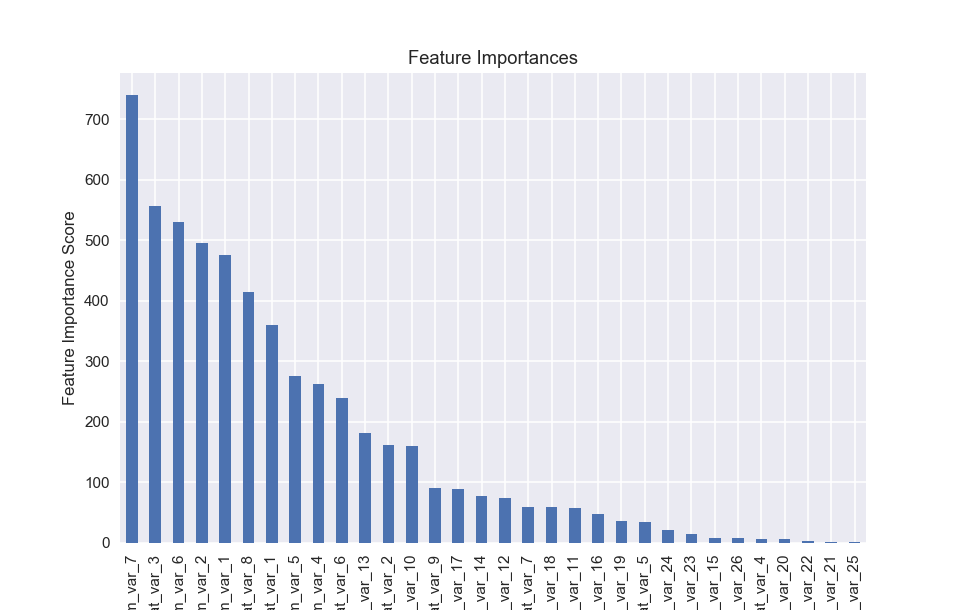

In [25]:
clf1 = modelfit(clf1, X_train, y_train, feature_names, early_stopping_rounds=100)

In [26]:
pred1 = clf1.predict_proba(test[feature_names])

In [28]:
## make submission
sub = pd.read_csv('sample_submissions.csv')
sub['target'] = pred1
sub.to_csv('sub_xgb0.csv', index=False)

In [31]:
## make submission
sub = pd.read_csv('sample_submissions.csv')
sub['target'] = clf1.predict(test[feature_names])
sub.to_csv('temp0.csv', index=False)

In [37]:
temp = pd.read_csv('sub_xgb0.csv')

In [40]:
temp['target'] = 1 - temp['target'] 

In [41]:
temp.head()

,transaction_id,target
0,id_1,0.048977
1,id_6,0.053496
2,id_9,0.059015
3,id_14,0.061898
4,id_15,0.068125


In [42]:
## make submission
sub = pd.read_csv('sample_submissions.csv')
sub['target'] = temp['target']
sub.to_csv('sub_xgbInv0.csv', index=False)